In [4]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import string

# Download NLTK resources
nltk.download('vader_lexicon')

# Load your cosmetic dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('/content/reviews_1250-end.csv')

# Assuming your dataset has 'text' column
X = df['review_text']

# Text preprocessing
def preprocess_text(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = ''.join([char for char in text if char not in string.punctuation])
        return text
    else:
        return ''

X = X.apply(preprocess_text)

# Use VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate compound scores for each review
compound_scores = X.apply(lambda text: sia.polarity_scores(text)['compound'])

# Assign labels based on compound scores
labels = compound_scores.apply(lambda score: 'positive' if score >= 0 else 'negative')

# Add labels to the DataFrame
df['label'] = labels

# Display the DataFrame with labels
print(df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-4-863786e43bf5>:10: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/reviews_1250-end.csv')


       Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0               0   1945004256       5             1.0     0.000000   
1               1   5478482359       3             1.0     0.333333   
2               2  29002209922       5             1.0     1.000000   
3               3   7391078463       5             1.0     1.000000   
4               4   1766313888       5             1.0     1.000000   
...           ...          ...     ...             ...          ...   
49972       49972   2276253200       5             1.0          NaN   
49973       49973  28013163278       5             1.0          NaN   
49974       49974   1539813076       5             1.0          NaN   
49975       49975   5595682861       5             1.0          NaN   
49976       49976  27666075558       5             1.0          NaN   

       total_feedback_count  total_neg_feedback_count  \
0                         2                         2   
1                         3      

In [ ]:
df['review_text'][3]

In [6]:
y=df.label
y

,label
0,positive
1,negative
2,positive
3,positive
4,negative
...,...
49972,negative
49973,positive
49974,positive
49975,positive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import string
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a sentiment analysis model pipeline
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Example of sentiment analysis on a new review using VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()
new_review = "i have noticed a significant reduction"
compound_score = sia.polarity_scores(new_review)['compound']

# Assign a label based on the compound score
new_prediction = 'positive' if compound_score >= 0 else 'negative'
print(f"Sentiment Prediction for the new review: {new_prediction}")


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

    negative       0.57      0.35      0.43       932
    positive       0.94      0.97      0.95      9064

    accuracy                           0.92      9996
   macro avg       0.75      0.66      0.69      9996
weighted avg       0.90      0.92      0.91      9996

Sentiment Prediction for the new review: positive


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

    negative       0.57      0.35      0.43       932
    positive       0.94      0.97      0.95      9064

    accuracy                           0.92      9996
   macro avg       0.75      0.66      0.69      9996
weighted avg       0.90      0.92      0.91      9996



<Figure size 1000x600 with 0 Axes>

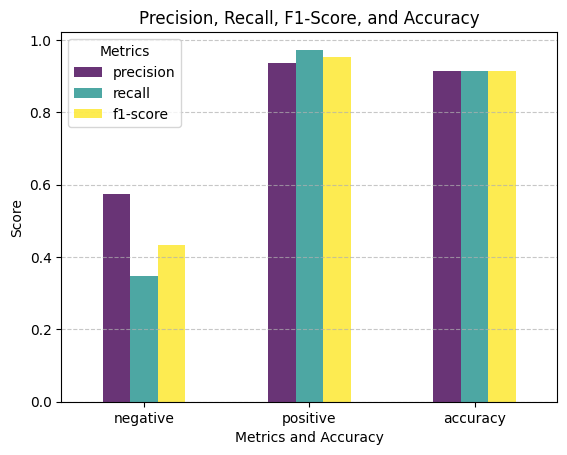

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Dummy dataset split for illustration (replace X_train, X_test, y_train, y_test with actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model with CountVectorizer
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Generate the classification report
report = classification_report(y_test, predictions, output_dict=True)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, predictions))

# ---------------- Visualization ---------------- #

# Extract metrics (precision, recall, f1-score) for the two classes
classes = list(report.keys())[:2]  # Extract only "negative" and "positive" classes
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for class-wise metrics
data = {metric: [report[cls][metric] for cls in classes] for metric in metrics}
metrics_df = pd.DataFrame(data, index=classes)

# Add accuracy as a single bar
metrics_df.loc['accuracy'] = [accuracy] * len(metrics)  # Accuracy across all metrics

# Plot the bar chart
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', alpha=0.8)
plt.title("Precision, Recall, F1-Score, and Accuracy")
plt.ylabel("Score")
plt.xlabel("Metrics and Accuracy")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
